### Desafio Titanic objetivos:
     1) Entender a base (analise descritiva)
     2)Qual o comportamento das variáveis
     3) Existe relação entre as variáveis 
     4) Quais variáveis tiveram impacto na sobrevivencia (Anova)
     5) Seleção de atributos
     6) O quanto que essas variaveis impactaram (Regressão)
     7) Sugestão/Conclusão
  LISTA PERGUNTAS

Bibliotecas

In [69]:
import pandas as pd 
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline 

Importação da base

In [25]:
base =pd.read_csv("C:/Users/012457631/Documents/Cursos_Resumos/Python/Titanic/train.csv")
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Formato da base

In [3]:
base.shape

(891, 12)

Informações da base/verificação de vazios

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dessa base podemos observar que existem vazios tanto na coluna idade quanto na coluna cabine, a coluna cabine é uma variavel mista que não agrega muito o estudo, já a coluna idade pode ser relevante. 

In [5]:
base['Age'].isnull().sum()

177

In [1]:
#Verificando se há impacto no calculo descritivo retirando os vazios de Age
#age_vazio=base['Age'].dropna(how="any", axis=0)
#age_vazio.describe()

Analise descritiva unidimensional geral

In [29]:
base[['Age', 'SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare,Pclass
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,2.308642
std,14.526497,1.102743,0.806057,49.693429,0.836071
min,0.420000,0.000000,0.000000,0.000000,1.000000
25%,20.125000,0.000000,0.000000,7.910400,2.000000
50%,28.000000,0.000000,0.000000,14.454200,3.000000
75%,38.000000,1.000000,0.000000,31.000000,3.000000
max,80.000000,8.000000,6.000000,512.329200,3.000000


Pelos dados descritivos Fare provavelmente não possui distribuição normal, sua média esta muito distante da mediana. As demais variáveis tem uma diferença menor entre estas medidas.
Abaixo os histogramas para melhor avaliação

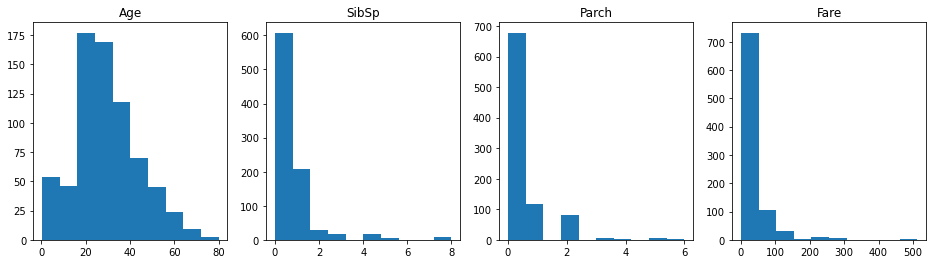

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
axes[0].hist(base['Age'])
axes[0].set_title("Age")

axes[1].hist(base['SibSp'])
axes[1].set_title("SibSp")

axes[2].hist(base['Parch'])
axes[2].set_title("Parch")

axes[3].hist(base['Fare'])
axes[3].set_title("Fare");

Apesar de idade lembrar a distribuição normal, ela não é simétrica.
Todas as variáveis possuem assimetria para esquerda, ou seja seus dados estão acumulados em valores menores, na embarcação tivemos a maioria mais jovem, com poucos (ou nenhum parente) e que pagaram o menor valor para viajar.

Análise unidimensional categóricas

Analise descritiva por sexo

<AxesSubplot:xlabel='Sex', ylabel='count'>

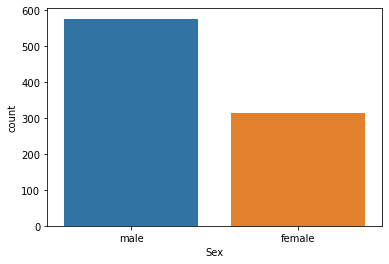

In [37]:
sns.countplot(x='Sex',data=base)

In [9]:
base[['Age', 'SibSp','Parch','Fare']][base['Sex']=="male"].describe()

,Age,SibSp,Parch,Fare
count,453.000000,577.000000,577.000000,577.000000
mean,30.726645,0.429809,0.235702,25.523893
std,14.678201,1.061811,0.612294,43.138263
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,29.000000,0.000000,0.000000,10.500000
75%,39.000000,0.000000,0.000000,26.550000
max,80.000000,8.000000,5.000000,512.329200


In [26]:
base[['Age', 'SibSp','Parch','Fare']][base['Sex']=="female"].describe()

,Age,SibSp,Parch,Fare
count,261.000000,314.000000,314.000000,314.000000
mean,27.915709,0.694268,0.649682,44.479818
std,14.110146,1.156520,1.022846,57.997698
min,0.750000,0.000000,0.000000,6.750000
25%,18.000000,0.000000,0.000000,12.071875
50%,27.000000,0.000000,0.000000,23.000000
75%,37.000000,1.000000,1.000000,55.000000
max,63.000000,8.000000,6.000000,512.329200


Quantidade: Na embarcação tiveram mais homens que mulheres.

Idade: Os homens obtiveram idade média e mediana pouco superior as mulheres, possível descarte na influencia da idade na sobrevivencia

Parentes: O valor para parentes parece estranho pois a maioria viajou sem parentes e estamos a olhar a média, mas pode-se afirmar que as mulheres tiveram mais parentes presentes na embarcação que os homens, provavelmente pois na época era responsabilidade das mulheres cuidar da familia, daqueles considerados mais novos que ela.

Tarifa paga (Fare): Aqui temos um sinalizador interessante, tanto na média quanto na mediana as mulheres pagaram praticamente o dobro para entrar na embarcação.

Analise descritiva por classe

<AxesSubplot:xlabel='Pclass', ylabel='count'>

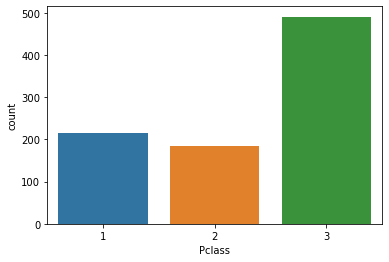

In [38]:
sns.countplot(x='Pclass',data=base)

In [40]:
base[['Age', 'SibSp','Parch','Fare']][base['Pclass']==1].describe()

,Age,SibSp,Parch,Fare
count,186.000000,216.000000,216.000000,216.000000
mean,38.233441,0.416667,0.356481,84.154687
std,14.802856,0.611898,0.693997,78.380373
min,0.920000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,30.923950
50%,37.000000,0.000000,0.000000,60.287500
75%,49.000000,1.000000,0.000000,93.500000
max,80.000000,3.000000,4.000000,512.329200


In [41]:
base[['Age', 'SibSp','Parch','Fare']][base['Pclass']==2].describe()

,Age,SibSp,Parch,Fare
count,173.000000,184.000000,184.000000,184.000000
mean,29.877630,0.402174,0.380435,20.662183
std,14.001077,0.601633,0.690963,13.417399
min,0.670000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,13.000000
50%,29.000000,0.000000,0.000000,14.250000
75%,36.000000,1.000000,1.000000,26.000000
max,70.000000,3.000000,3.000000,73.500000


In [42]:
base[['Age', 'SibSp','Parch','Fare']][base['Pclass']==3].describe()

,Age,SibSp,Parch,Fare
count,355.000000,491.000000,491.000000,491.000000
mean,25.140620,0.615071,0.393075,13.675550
std,12.495398,1.374883,0.888861,11.778142
min,0.420000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,7.750000
50%,24.000000,0.000000,0.000000,8.050000
75%,32.000000,1.000000,0.000000,15.500000
max,74.000000,8.000000,6.000000,69.550000


Quantidade: A maioria dos viajantes eram da terceira classe

Idade: Aqui é interessantes observar que a idade reduz enquanto a classe vai da primeira a terceira, temos em média pessoas mais velhas na primeira classe e mais novas na terceira, pode-se supor que a pessoa foi adquirindo bens com o tempo e pode assim pagar a mais pelo seu conforto no navio

Parentes: Em relação aos parentes, pouco se difere entre as classes, principalmente entre a primeira e a segunda, a terceira é a que possui a maior média na quantidade de parentes, históricamente é comum familias com menos renda serem mais numerosas que as mais favorecidas financeiramente

Tarifa paga (Fare): Como esperado a primeira classe pagou passagens mais caras que a segunda e a segunda que a terceira

Analise descritiva por embarcação (onde embarcou)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

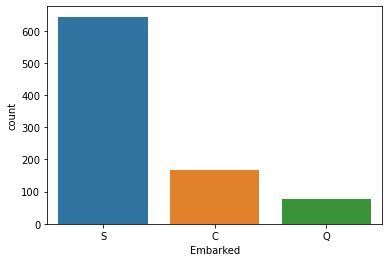

In [44]:
sns.countplot(x='Embarked',data=base)

In [46]:
base[['Age', 'SibSp','Parch','Fare']][base['Embarked']=="S"].describe()

,Age,SibSp,Parch,Fare
count,554.000000,644.000000,644.000000,644.000000
mean,29.445397,0.571429,0.413043,27.079812
std,14.143192,1.216600,0.853253,35.887993
min,0.670000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,13.000000
75%,38.000000,1.000000,0.000000,27.900000
max,80.000000,8.000000,6.000000,263.000000


In [114]:
base[['Age', 'SibSp','Parch','Fare']][base['Embarked']=="C"].describe()

,Age,SibSp,Parch,Fare
count,130.000000,168.000000,168.000000,168.000000
mean,30.814769,0.386905,0.363095,59.954144
std,15.434860,0.557213,0.660481,83.912994
min,0.420000,0.000000,0.000000,4.012500
25%,21.250000,0.000000,0.000000,13.697950
50%,29.000000,0.000000,0.000000,29.700000
75%,40.000000,1.000000,1.000000,78.500025
max,71.000000,2.000000,3.000000,512.329200


In [48]:
base[['Age', 'SibSp','Parch','Fare']][base['Embarked']=="Q"].describe()

,Age,SibSp,Parch,Fare
count,28.000000,77.000000,77.000000,77.000000
mean,28.089286,0.428571,0.168831,13.276030
std,16.915396,0.979105,0.656999,14.188047
min,2.000000,0.000000,0.000000,6.750000
25%,17.500000,0.000000,0.000000,7.750000
50%,27.000000,0.000000,0.000000,7.750000
75%,34.500000,0.000000,0.000000,15.500000
max,70.500000,4.000000,5.000000,90.000000


Informação Relevante: A embarcação partiu em sua viagem inaugural de Southampton com destino a Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville, na França, e por Queenstown, na Irlanda

Quantidade:A maioria saiu de Southampton (S) e a entrada foi reduzindo nos demais postos, provavelmente pois a quantidade de vagas foi reduzindo ao longo do percurso

Idade:Não há tanta diferenciação entre as idades.

Parentes:Tiveram mais pessoas com parentes em Southampton, mas isso pode ser explicado por serem maioria no navio, logo quanto maior a quantidade de pessoas, maior a probabilidade de estarem acompanhadas

Tarifa paga (fare):As tarifas mais caras foram pagas em Cherbourg-Octeville, em média mais que o dobro que Southampton e mais que o triplo em Queenstown.

Analise descritiva por sobreviviventes

In [ ]:
boxplot tarifasXportoXclasse

<AxesSubplot:xlabel='Survived', ylabel='count'>

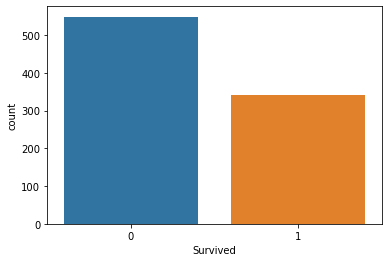

In [50]:
sns.countplot(x='Survived',data=base)

In [51]:
base[['Age', 'SibSp','Parch','Fare']][base['Survived']==0].describe()

,Age,SibSp,Parch,Fare
count,424.000000,549.000000,549.000000,549.000000
mean,30.626179,0.553734,0.329690,22.117887
std,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.854200
50%,28.000000,0.000000,0.000000,10.500000
75%,39.000000,1.000000,0.000000,26.000000
max,74.000000,8.000000,6.000000,263.000000


In [52]:
base[['Age', 'SibSp','Parch','Fare']][base['Survived']==1].describe()

,Age,SibSp,Parch,Fare
count,290.000000,342.000000,342.000000,342.000000
mean,28.343690,0.473684,0.464912,48.395408
std,14.950952,0.708688,0.771712,66.596998
min,0.420000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,12.475000
50%,28.000000,0.000000,0.000000,26.000000
75%,36.000000,1.000000,1.000000,57.000000
max,80.000000,4.000000,5.000000,512.329200


Quantidade: Como sabemos a maioria não sobreviveu.

Idade: A idade precisa de uma analise mais aprofundada, a mediana em ambos os casos é a mesma que a mediana de idade geral (28 anos)

Parentes: Somente com os dados vistos não é possível concluir o impacto  na sobrevivencia por ter parentes a bordo.

Tarifa paga (Fare): Em média, aqueles que sobreviveram pagaram mais que o dobro dos que não, então o fator financeiro teve sim relevancia na sobrevivencia.

Algumas analises gráficas categóricas com segmentação

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

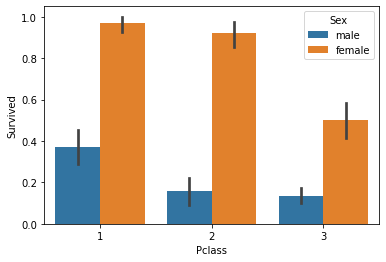

In [63]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=base)

#adendo mulheres sobreviveram
#fareXclasseXporto
Como esperado a maioria dos sobreviventes foram mulheres das classes mais altas

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

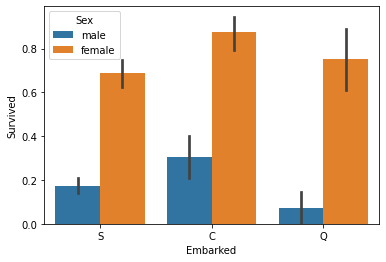

In [111]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=base)

Apesar de termos visto que a maioria saiu de Southampton, os que tiveram maior exito de sobrevivencia saíram de Cherbourg-Octeville (C), Cherbourg-Octeville foi o porto que teve em média pessoas pagando mais pela passagem, reforçando assim a hipótese que os que pagaram mais tiveram mais exito em sobreviver.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

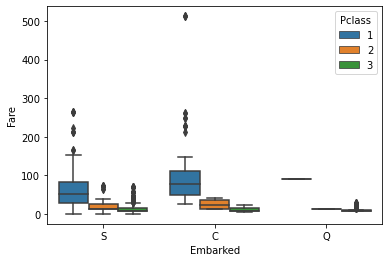

In [110]:
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=base)

Como Sobrevivencia é um dado categórico, é preciso realizar o teste QUI QUADRADO para decidir se o atributo é relevante(se há diferença significativa) o não para o modelo.

In [74]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [78]:
freq_table_Sex = pd.crosstab(base['Survived'], base['Sex'])
_, p, _, _ = chi2_contingency(freq_table_Sex)
p

1.1973570627755645e-58

In [80]:
freq_table_Pclass = pd.crosstab(base['Survived'], base['Pclass'])
_, p, _, _ = chi2_contingency(freq_table_Pclass)
p

4.549251711298793e-23

In [81]:
freq_table_Embarked = pd.crosstab(base['Survived'], base['Embarked'])
_, p, _, _ = chi2_contingency(freq_table_Embarked)
p

1.769922284120912e-06

Todas as variáveis categóricas são relevantes para o modelo, como são categóricas transformarei em dummies para prosseguimento

In [96]:
dumies=["Sex", "Embarked","Pclass"]
base_dumies = pd.get_dummies(base[dumies])
base_dumies

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,0,1
1,1,1,0,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,0,1
4,3,0,1,0,0,1
...,...,...,...,...,...,...
886,2,0,1,0,0,1
887,1,1,0,0,0,1
888,3,1,0,0,0,1
889,1,0,1,1,0,0


In [105]:
base['Pclass'].replace([1,2,3],['classe1','classe2','classe3'])
dumieclasse=pd.get_dummies(base['Pclass'])
base['classe1'] = dumieclasse[1]
base['classe2'] = dumieclasse[2]
base['classe3'] = dumieclasse[3]
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,classe1,classe2,classe3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [ ]:
resignificar